# imports

In [1]:
!pip install openai
!pip install PyMuPDF
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.9 MB/s et

In [2]:
import openai
import datetime
import gradio
from openai import OpenAI
import json
from google.colab import files
import io
import fitz
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances

# API Keys

In [3]:
# Replace 'your-api-key' with your actual API key
client = OpenAI(api_key="sk-proj-G6lsqPga6HQqgEEkOp6sT3BlbkFJyWzCUym3mQAdgrhDBIUO")

# Part I

## Basic ChatGPT API Call

In [4]:
response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "user", "content": "Tell me a the story of google in 100 words"}
        ])

In [5]:
# lets see how the response looks like
response.dict()

{'id': 'chatcmpl-9TT3NyOiSzAbjHyqDAuwL5RDSex15',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': 'In 1998, Larry Page and Sergey Brin, two graduate students at Stanford University, founded Google. Initially called "Backrub," the search engine was later renamed and quickly became a household name. Google\'s innovative algorithm revolutionized the way information is organized and accessed on the internet, making it the go-to search engine for billions of users worldwide. The company expanded its services to include Gmail, Google Maps, and YouTube, setting the bar for online innovation. Today, Google is a tech giant, with a diversified portfolio that includes Android, Chrome, and cloud computing services, solidifying its position as a leader in the digital space.',
    'role': 'assistant',
    'function_call': None,
    'tool_calls': None}}],
 'created': 1716810221,
 'model': 'gpt-3.5-turbo-1106',
 'object': 'chat.completion',
 'system_

In [6]:
# lets navigate to the message/answer
answer = response.dict()["choices"][0]["message"]["content"]   #[0]is to limit the number of answers, since the model can generate multiple answers
answer

'In 1998, Larry Page and Sergey Brin, two graduate students at Stanford University, founded Google. Initially called "Backrub," the search engine was later renamed and quickly became a household name. Google\'s innovative algorithm revolutionized the way information is organized and accessed on the internet, making it the go-to search engine for billions of users worldwide. The company expanded its services to include Gmail, Google Maps, and YouTube, setting the bar for online innovation. Today, Google is a tech giant, with a diversified portfolio that includes Android, Chrome, and cloud computing services, solidifying its position as a leader in the digital space.'

## How the 'chatting' part works

In [7]:
# conversation log aka 'shortterm memory'
conversation_log = [
    {"role": "user", "content": "Hi, I am Alex. may i introduce myself? "},
    {"role": "assistant", "content": "sure, go along!"},
    {"role": "user", "content": "I i have one dog called peter and I love cooking, i have an allergy against rice, pasta and bread, and i am a big fan of cabbage"},
    {"role": "assistant", "content": "nice to meet you!"}
]

In [8]:
input = [{"role": "user", "content": "please suggest a recipie i can cook for myself tonight"}]

response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages= input)

In [9]:
answer = response.dict()["choices"][0]["message"]["content"]
answer

"How about trying a simple and comforting recipe for Spaghetti Aglio e Olio? Here's what you'll need:\n\nIngredients:\n- 200g spaghetti\n- 4 cloves garlic, thinly sliced\n- 1/4 cup extra virgin olive oil\n- 1/2 teaspoon red pepper flakes\n- Salt, to taste\n- Freshly ground black pepper, to taste\n- Grated Parmesan cheese, for serving\n- Chopped fresh parsley, for garnish\n\nInstructions:\n1. Cook the spaghetti in a large pot of boiling salted water until al dente. Drain the spaghetti, reserving 1/2 cup of the pasta water.\n\n2. While the spaghetti is cooking, heat the olive oil in a large skillet over medium heat. Add the garlic and cook, stirring frequently, until the garlic is golden brown and crispy. Be careful not to burn the garlic.\n\n3. Add the red pepper flakes to the skillet and stir for about 30 seconds.\n\n4. Add the cooked spaghetti to the skillet, tossing to coat evenly with the garlic-infused oil. If the pasta seems dry, add a little of the reserved pasta water to moisten

##Two talking Bots

You can make multiple 'bots' talk to eachother simply by calling the API in a loop while maintaining the conversation_log/ shortterm memory.

In [10]:
# wrap the API call into a function for easy re-use
def ask_chatgpt_statefull(messages, model="gpt-3.5-turbo-1106"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    # Convert the response to a dictionary
    response = response.dict()

    # Accessing the content of the response
    return response['choices'][0]['message']['content']

Lets run an LLM in a loop!

In [11]:
# initialize the conversation
conversation_log = [{"role": "user", "content": "come up with a random topic about traveling and tell a story"}]

for i in range(4):
  # call chatGPT
  description = ask_chatgpt_statefull(conversation_log)

  # add response to conversation_log in the chatgpt schema & print for review
  # Note, we add instructions for the second API call at the end
  conversation_log.append({"role": "assistant", "content":description+ ". Now ask me a why question:" })
  print("because bot: ", description, "\n__________")


 # call the chatGPT API again with the updated conversation_log
  why_question = ask_chatgpt_statefull(conversation_log)
  print("why bot: ", why_question, "\n=========")

  conversation_log.append({"role": "user", "content":why_question })

because bot:  Topic: Unforgettable encounters while traveling

Story:
During a solo trip to Southeast Asia, I had the opportunity to visit a small, remote village nestled deep in the mountains of northern Thailand. As I wandered through the narrow, bustling streets, I couldn't help but notice the vibrant energy and warmth of the local community.

One afternoon, while exploring the village's vibrant marketplace, I stumbled upon an elderly woman selling intricately woven textiles. As I admired her beautiful creations, she beckoned me over with a warm smile and insisted I join her for a cup of tea. Despite the language barrier, we managed to communicate through gestures and laughter.

As we sat together, sipping fragrant tea and surrounded by the colorful fabrics, the woman began to share stories of her life and the traditions of her village. Through her animated gestures and twinkling eyes, I could feel her deep connection to the land and the strong sense of community that bound the vill

## Leveraging Language Models (LLM) for Structured Data Extraction

In practice this could mean to extract sentiment from text, emotions from images, or categorise product descriptions.

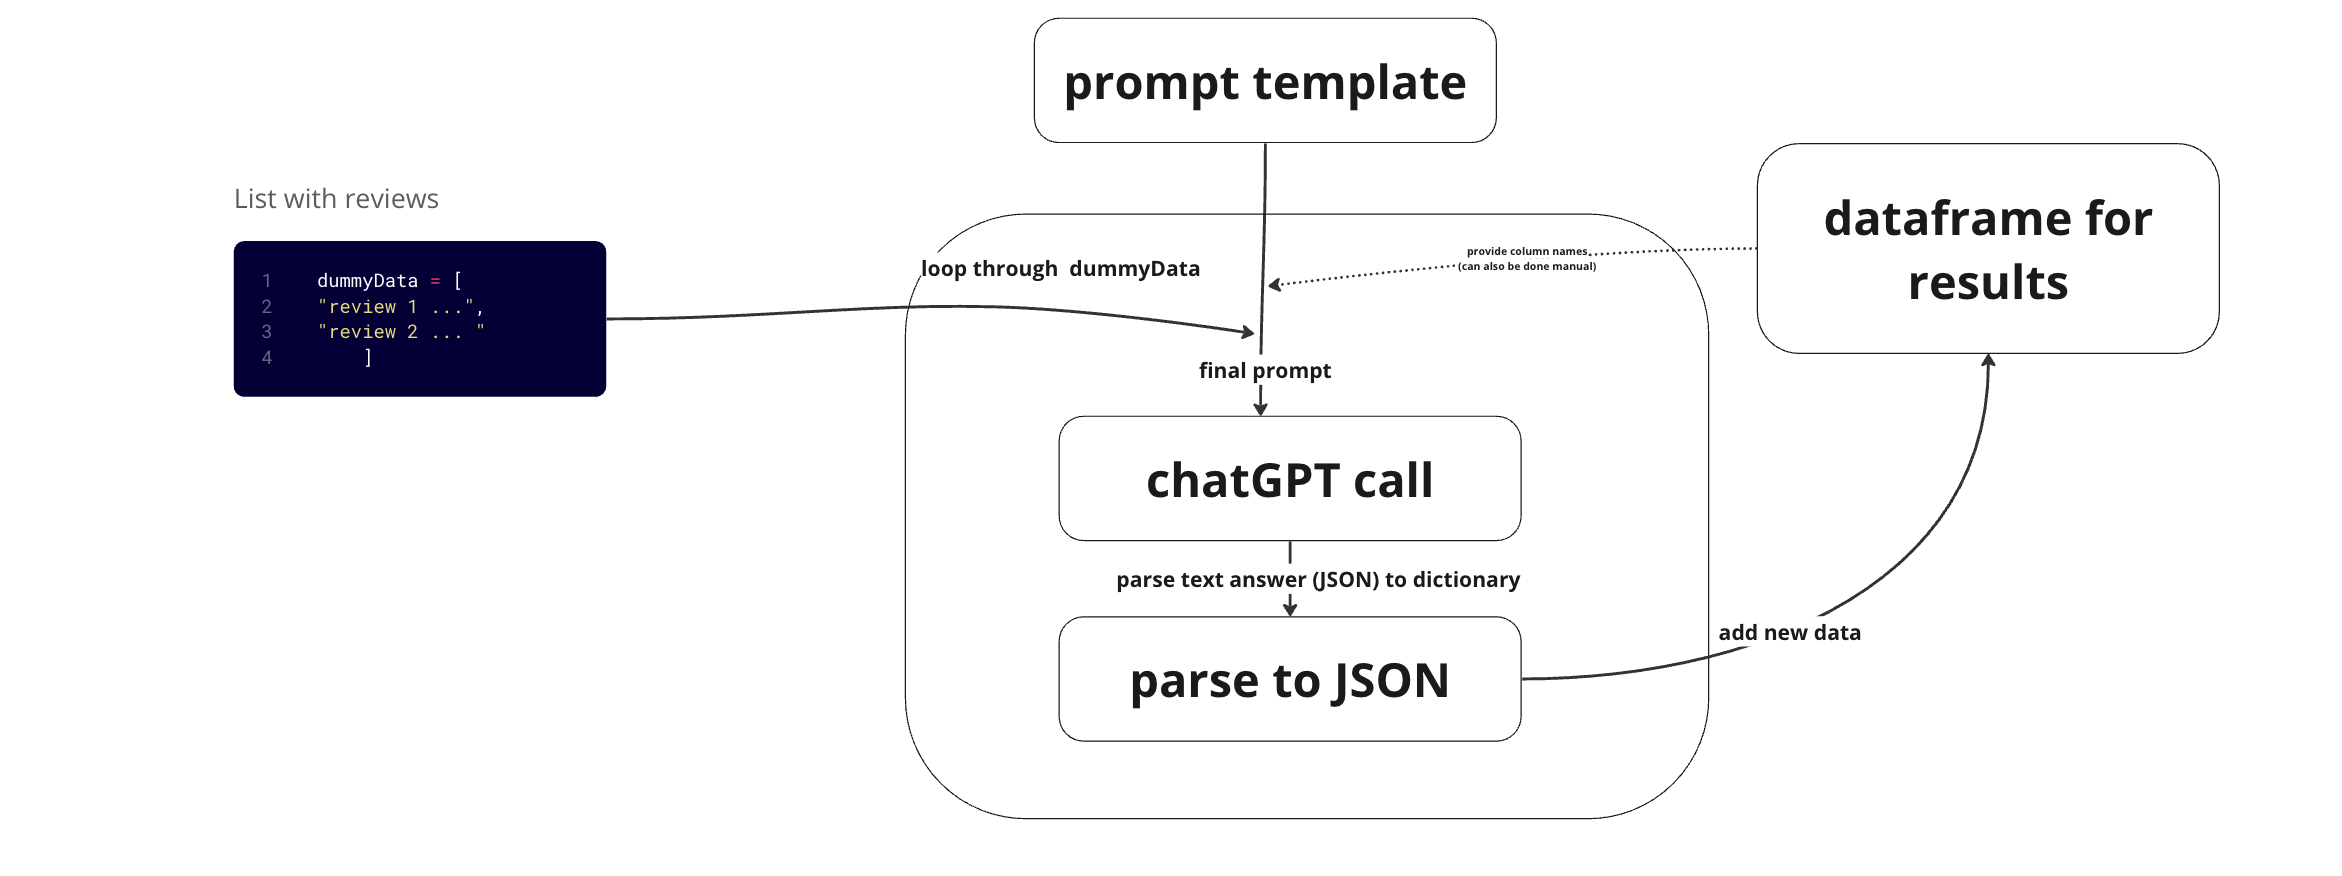

In this example we loop throuhg a list of unstructured amazon product reviews with the goal to add them to dataframe where we categorize and tag each review.

##### DummyData (a list of random amazon reviews)

In [12]:
dummyData = [
    """1.0 out of 5 stars Overpriced, No after service Edit: I purchased cafe birraio machine which is excellent in every term.
    Thanks Amazon for great service. Seller was not able to solve problem. Returned it.
    No after sales support. No support from seller or intermediate platform. If it fails you are at your own. My machine failed in 3 months.
    Most important: If you are buying this just remember you are on your own as there is no seller support post sales and they don’t have any idea what’s going on and they don’t reply as well. So warranty looks like on papers only, and looks there will not be any support if anything happens.
    This is one of the worst performing espresso machine. Highly overpriced. Steam pressure is very low, You don’t get well frothed milk. It need a 20-25 minute break after 2 cup of coffee because it’s boiler gets over heated.
    5 people found this helpful""",
    """ 5.0 out of 5 stars Prima di lasciare questa recensione ho aspettato qualche mese per provarla bene. Devo dire che sono rimasto soddisfatto! La macchina si presenta bene dal punto di vista estetico, solida, con corpo in acciaio inox e qualche plastica, di dimensioni appropriate e non invadenti. Il macinino dopo mesi di utilizzo funziona egregiamente. Lo scaldatazze superiore è discreto. Il caffè viene estratto in maniera decisamente buona, ad una temperatura ottimale. A tal proposito consiglio, dopo l'accensione, di mettere la tazzina del caffè sotto l'erogatore in modo che si scaldi bene quando esegue il ciclo di pulizia e dopo svuotarla e rimetterla di nuovo sotto l'erogatore avviando un altro ciclo di pulizia: noterete che questa volta l'acqua esce con sbuffi di vapore ed in maniera meno regolare; da questo momento in poi ad ogni erogazione di acqua questa esce regolarmente ed in maniera appropriata per un'estrazione ottimale del caffè. Consiglio questa manovra ad ogni nuova accensione della macchina. Ho letto in alcune recensioni che è stato notato un difetto di erogazione quando si preparano 2 caffè, nel senso che uscirebbe maggiormente dall'ugello di sinistra: nel mio caso questo non è mai accaduto come potete notare dal video allegato. A questo proposito consiglierei di valutare con attenzione la collocazione della macchina perfettamente in piano e, soprattutto, prima di effettuare la pressatura di utilizzare un distributore di caffè che consenta di livellarlo nel portafiltro in maniera ottimale per l'estrazione. Per quanto riguarda il montalatte lo trovo buono anche se non eccelso. Il filtro addolcitore dopo 2 mesi di utilizzo l'ho sostituito con un filtro DLSC002 marca Queta (acquistato sempre su Amazon), che alla prova funziona egregiamente e si adatta alla macchina meglio di quello in dotazione che probabilmente era un De Longhi originale ma che sembrava meno stabile e in più costa molto meno della metà. Attenzione perché nella descrizione del filtro non viene mai citata la compatibilità con la macchina Ariete 1313 e questo potrebbe far desistere dall'acquisto ed anch'io ero un po' titubante, ma avendo notato nella descrizione che le misure del filtro combaciavano con quello in dotazione mi sono deciso ad acquistarlo. Un'ultima considerazione per la riuscita ottimale di un buon caffè è di provare la miscela in grani che più si adatta al vostro gusto e di sperimentare per ogni miscela il giusto grado di macinazione, la giusta quantità di acqua da programmare per l'erogazione e la giusta quantità di caffè da caricare nel filtro: possono sembrare banalità ma vi assicuro che sono fondamentali. All'inizio bisogna sperimentare e poi una volta trovato il giusto equilibrio diventa tutto meccanico e semplice. Alla luce anche del fattore prezzo (ho acquistato la macchina in offerta pagandola intorno ai 250 euro) direi che è un ottimo acquisto e la consiglio.
    Read less
    12 people found this helpful""",
    """5.0 out of 5 stars Zuverlässige und erschwingliche Bleistifte für den alltäglichen Gebrauch
    Reviewed in Germany on 5 October 2023
    Size Name: 1 stück (30er Pack)Verified Purchase
    Ich habe vor kurzem die Amazon Basics holzgefassten Bleistifte gekauft und möchte meine Erfahrungen mitteilen.
    Die Bleistifte bestehen aus hochwertigem Holz und haben eine angenehme Haptik. Sie liegen gut in der Hand und sind leicht zu handhaben. Die Mine ist mittelhart und ermöglicht ein präzises Schreiben und Zeichnen. Die Bleistifte lassen sich leicht spitzen und die Mine bricht nicht leicht ab.
    Die Haltbarkeit der Bleistifte ist beeindruckend. Trotz des täglichen Gebrauchs halten sie erstaunlich lange. Ich habe bereits zahlreiche Seiten mit ihnen gefüllt und sie funktionieren immer noch einwandfrei.
    Ein weiterer Vorteil ist der angebrachte Radiergummi. Er ist von guter Qualität und ermöglicht ein einfaches Radieren von Fehlern und Korrekturen. Die Radierer hinterlassen keine unschönen Spuren auf dem Papier und sind ausreichend groß.
    Die Verpackung der Bleistifte ist einfach und zweckmäßig. Sie kommen in einer einfachen Plastikhülle, die die Bleistifte schützt und sicher aufbewahrt.
    Der Preis der Amazon Basics holzgefassten Bleistifte ist unschlagbar. Sie bieten ein ausgezeichnetes Preis-Leistungs-Verhältnis, insbesondere wenn man bedenkt, dass es sich um ein Set von 30 Bleistiften handelt.
    Ob für den Schulgebrauch, das Büro oder den alltäglichen Gebrauch zu Hause - die Amazon Basics holzgefassten Bleistifte sind eine zuverlässige Wahl. Sie bieten eine solide Leistung und sind erschwinglich. Ich kann diese Bleistifte jedem empfehlen, der eine kostengünstige Option für den täglichen Gebrauch sucht und dabei nicht auf Qualität verzichten möchte.
    Read less
    5 people found this helpful""",
    """5.0 out of 5 stars Top Lampe! Perfekt.Reviewed in Germany on 27 April 2024
    Verified Purchas Wirklich toll diese Lampe. Habe schon die zweite davon gekauft. Gute Helligkeit. Diverse Farbmodi. Leicht zu installieren (geht fast automatisch, WLAN etc.). Durch die App hat man immer alles unter Kontrolle. Gut, die Optik der Lampe ist nicht so ganz stylisch. Das könnte man anders designen, aber gut. Sie tut, was sie soll. Kleiner Kritikpunkt: In der App müsste man direkt sehen, ob die Lamp bereits eingeschaltet ist (ähnlich wie bei FRITZ! von AVM). Da ist der Regler dann grün. Hier muss man erst in der App in die Oberfläche der Lampe klicken. Aber das ist nur ein kleiner Punkt. Sonst kann ich sie nur empfehlen."""
]

##### Code

1. Create a Dataframe to collect information extracted from the reviews

In [13]:
# lets initialize a dataframe with the columns
# named after information we are intereded in
columnNames = ["productCategory", "reviewSentiment", "reviewSummaryEnglish"]
dataCollection = pd.DataFrame(columns = columnNames)

2. (optional) Trun the empty dataframe into a dictionary and then into a JSON string. We can use that string to tell the LLM how we want the answer to be structured!

In [14]:
# dataframe ->  dictionary -> text string
data_dict = dataCollection.to_dict(orient='list')
data_dict_json = json.dumps(data_dict).replace("[]", '""')

# lets take a look at the resulting string
data_dict_json

'{"productCategory": "", "reviewSentiment": "", "reviewSummaryEnglish": ""}'

3. Assemble the prompt-template

In [15]:
# this might get a bit longer
prompt_template = f"""
Your task is to analyse the product reviews from a webplatform you will see below. You should try
your best to determine infomration on these subjects {str(columnNames)}.

Please return you answer in the structure of a JSON. DO not add any comment or
thouhgts, only aswer with the json. Below is an example of how the JSON shall be
formated: {data_dict_json}.

the review text:
"""

4.  loop through the list of dummyData
*   construct the final prompt
*   call the LLM
*   parse the JSON part to a dict
*   add to dataCollection

In [16]:
for review in dummyData:

  # construct final prompt
  final_prompt = prompt_template + review
  #print ("final prompt: ", final_prompt)

  # call the LLM, navigate to answer message
  response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "user", "content": final_prompt}
        ])


  answer = response.dict()["choices"][0]["message"]["content"]
  print("answer: ", answer)

  # parse the JSON part (might fail if llm makes a mistake)
  answer_dict = json.loads(answer)
  answer_df =  pd.DataFrame(answer_dict, index=[0])

  # add to dataframe
  dataCollection = pd.concat([dataCollection, answer_df], ignore_index=True)


answer:  {"productCategory": "espresso machine", "reviewSentiment": "negative", "reviewSummaryEnglish": "Overpriced, No after service"}
answer:  {"productCategory": "coffee machine", "reviewSentiment": "positive", "reviewSummaryEnglish": "Highly satisfied with the coffee machine, good build quality, optimal temperature for coffee extraction, some tips for better performance, positive feedback on using a different brand filter"}
answer:  {"productCategory": "Bleistifte", "reviewSentiment": "positive", "reviewSummaryEnglish": "Reliable and affordable pencils for everyday use"}
answer:  {"productCategory": "Lamp", "reviewSentiment": "Positive", "reviewSummaryEnglish": "Top Lamp! Perfect. Really great lamp. Bought the second one already. Good brightness. Various color modes. Easy to install (almost automatically, WLAN, etc.). Through the app, you always have everything under control. The look of the lamp is not so stylish. That could be designed differently, but it's okay. It does what it'

In [17]:
# lets see the result
dataCollection

,productCategory,reviewSentiment,reviewSummaryEnglish
0,espresso machine,negative,"Overpriced, No after service"
1,coffee machine,positive,"Highly satisfied with the coffee machine, good..."
2,Bleistifte,positive,Reliable and affordable pencils for everyday use
3,Lamp,Positive,Top Lamp! Perfect. Really great lamp. Bought t...


# Part II

## chatGPT Vision

### utilities


In [18]:
from PIL import Image # python libary for image processing
from io import BytesIO
import base64

In [19]:
# turning an image to its b64 encoding (-> sending it as text)
def image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")  # You can change the format to PNG or other types if needed
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

### main part

In [20]:
# upload image and transform to PIL format
uploaded_img_vis = files.upload()
filename = next(iter(uploaded_img_vis))
image_vis = Image.open(BytesIO(uploaded_img_vis[filename]))

Saving 屏幕截图 2024-05-26 19223701.jpg to 屏幕截图 2024-05-26 19223701.jpg


In [21]:
def gpt_vision(vision_prompt, image_encoded):
  response = client.chat.completions.create(
      model="gpt-4-vision-preview",
      messages=[
          {
            "role": "user",
            "content": [
              {"type": "text", "text": vision_prompt},
              { "type": "image_url",
                "image_url": {
                  "url": "data:image/jpeg;base64,"+ image_encoded,
                },
              },
            ],
          },
        ],
        max_tokens=800,
  )
  return response.choices[0].message.content

In [22]:
base64_image = image_to_base64(image_vis)

In [ ]:
img_desc = gpt_vision("where do you think was the image taken? try to analyse all aspects? then rank a few potential locations ", base64_image)

In [ ]:
img_desc

'This image depicts a very small and cramped living space. To determine potential locations where this image might have been taken, we can look at various aspects such as space utilization, cultural items, and the context of the text present in the image.\n\nThe overcrowded and efficient use of vertical space for storage, as well as the compact nature of the dwelling, could suggest a location within a densely populated city where real estate is at a premium. Cities known for such small living spaces often include major urban centers in Asia. For instance, "cage homes" or "micro-apartments" are commonly found in places like Hong Kong due to the high population density and limited living space, making it a potential candidate for such an image.\n\nThe contents of the shelf and the decorations, however, are not distinctly indicative of any specific location. The picture frame, bags, and other personal belongings could be found in many regions around the world. It is the extreme space cons

## TASK I: create a gptVision App
Brainstorm a idea for an simple gradio app utilizing gpt and gptVision

In [23]:
global gptVisionAppPromptTemplate
gptVisionAppPromptTemplate = """
Here is an image, try to assign functions and furnitures to the spaces with an code on the image.
Return a dictionary with a python dictionary format, {01:[function, [furniture01, furniture02]]}


 """

In [24]:
def gptVisionApp(prompt, image):
  # encode to b64
  image_encoded = image_to_base64(image)

  global gptVisionAppPromptTemplate
  final_prompt = gptVisionAppPromptTemplate + prompt

  res = gpt_vision(final_prompt,image_encoded)

  return res


In [25]:
# Gradio interface setup
iface = gradio.Interface(
    fn=gptVisionApp,
    inputs=[
        gradio.Textbox(label="Optional Text Prompt"),
        gradio.Image(type="pil", label="Upload Image" ),
    ],
    outputs=[
        gradio.Textbox(label="Output from ChatGPT Vision"),
    ],
    title="your app title",
    description="Upload an image and optionally add text to get a response from the ChatGPT Vision model."
)

# Run the interface
iface.launch(debug = True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://421ea4e5c56507ffc3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://421ea4e5c56507ffc3.gradio.live


We have changed the image to a sofisticated floor plan with dimensions in order to improve the results, but it didn't work well.

### gptVision App example

In [ ]:
from pathlib import Path
import tempfile

In [ ]:
global gptVisionAppPromptTemplate
gptVisionAppPromptTemplate = """
analyze the image with different vegetables and signs, give me a list with
each vegetable's name in english and the price per kg. Carefully analyze the
image and the text on the sign. return me a python dictionary format:
{vegetable: 1}

Only anwser with a valid list, do not add anything else, no comments or thoughs


 """

In [ ]:
def gptVisionApp(prompt, image):
    # Assuming `image_to_base64` and `gpt_vision` are defined elsewhere
    image_encoded = image_to_base64(image)  # Convert image to base64 encoded string

    global gptVisionAppPromptTemplate
    final_prompt = gptVisionAppPromptTemplate + prompt

    res = gpt_vision(final_prompt, image_encoded)  # Assume this returns a string response
    res = str(res)  # Ensure response is string

    # Write output to a temporary .ics file
    temp_dir = tempfile.gettempdir()
    temp_file_path = Path(temp_dir) / "output.ics"
    with open(temp_file_path, "w") as file:
        file.write(res)

    # Return the path to the temporary file
    return res, str(temp_file_path)

In [ ]:
# Gradio interface setup
iface = gradio.Interface(
    fn=gptVisionApp,
    inputs=[
        gradio.Textbox(label="Optional Text Prompt"),
        gradio.Image(type="pil", label="Upload Image"),
    ],
    outputs=[
        gradio.Textbox(label="Output from ChatGPT Vision"),
        gradio.DownloadButton(label="Download Output"),  # Correct use of DownloadButton
    ],
    title="Your App Title",
    description="Upload an image and optionally add text to get a response from the ChatGPT Vision model."
)

# Run the interface
iface.launch(debug = True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a1fadd11c75395d96f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a1fadd11c75395d96f.gradio.live


# Part III

## Use LLM's to controll function parameter

In [26]:
def callGPT(messages, model="gpt-3.5-turbo-1106"):
    response = client.chat.completions.create(
        model=model,
        #response_format={"type": "json_object"},
        messages=[{"role": "user", "content": messages}],
    )
    return response.choices[0].message.dict()

In [27]:
user_prompt = "whats the time right now?"


response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=[{"role": "user", "content": user_prompt}],
    )
response.choices[0].message.dict()["content"]


"I'm an AI and do not have real-time capabilities to provide the current time. Please check the time on your device or ask a trusted source."

Lets create a setup

In [28]:
def callGPT(messages, model="gpt-3.5-turbo-1106"):
    response = client.chat.completions.create(
        model=model,
        response_format={"type": "json_object"},
        messages=[{"role": "user", "content": messages}],
    )
    return response.choices[0].message.dict()

In [29]:
# lets create a function to check the time!
def getTime(time_type):
  # return day time or date
  now = datetime.datetime.now()
  if time_type.lower() == "day_time":
      return now.strftime("%H:%M:%S")
  elif time_type.lower() == "date":
      return now.strftime("%Y-%m-%d")

In [30]:
prompt_template = """
You are a helpfull assistant. Try your best to fullfill the user query. To empower
you further you can use the "getTime" tool. in oder to use it answer in the following
JSON format:

{"message":"your regular message to  the user",
"tool":"getTime"
"args":{"time_type":"date"}
}

if you dont need to use the tool only leve "tool" and "args" empty. If you use the tool
use the message field to explain your argument choices.
The argument time_type can either be "date" (to get the current y:m:d) or
day_time to the the current time (h:m:s).

Ensure to always answer in exactly that json fomrat. Do not add any comments or thoughts.
Below is the user query:
"""

In [31]:
user_prompt = "is it afternoon right now?"

In [32]:
final_prompt = prompt_template + user_prompt
res = callGPT(final_prompt)

resdict = json.loads(res["content"])

Lets bring it all together:

In [33]:
# lets use the arguments to actually call the function
final_prompt = prompt_template + user_prompt
res = callGPT(final_prompt)

resdict = json.loads(res["content"])
print (resdict)
if resdict["tool"] == "getTime":
  timeType = resdict["args"]["time_type"]
  curTime = getTime(timeType)
  print(timeType)

  # conduct second API call to provide the user with the complete anwser
  promptWithData = f"""This is the result of using the getTime tool with the
  argument <{timeType}>: <{curTime}>. Use the infromation to answer the user query:
  {user_prompt}
  """

  finalRes = callGPT(promptWithData)
  print ("final outcome: ", finalRes["content"])

{'message': 'It is currently afternoon.', 'tool': 'getTime', 'args': {'time_type': 'day_time'}}
day_time


BadRequestError: Error code: 400 - {'error': {'message': "'messages' must contain the word 'json' in some form, to use 'response_format' of type 'json_object'.", 'type': 'invalid_request_error', 'param': 'messages', 'code': None}}

## TASK II: Add natural language controll spatial analysis

Based on the examples above and previous classess on osmnx and networkx.

see Stasyas Notebook: https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb#scrollTo=-7vrUW-fOsRT

In [34]:
# additional imports
!pip install osmnx geopy scikit-learn
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.3 MB/s eta 0:00:00


In [35]:
prompt_template = '''The user will ask you questions, You can use the following tools to answer those if youthink they can help delivering the best reults:
Tools:
“navigationTool”: this tool allows you to find the shortest path between an origin and a destination adress.
The tool has the following arguments/inputs you need to derive from the user request as good as possible. The tool will return the travel time, travel distance, and a map of the route.
Inputs: origin (address name),
destination (address name),
regionName (region),
travelMode (car, bike, pedestrian)
You have to return your answer in the following format:
{
“message”: <your normal message>,
“tool”: <the tool you want to use>,
“args”:{
“origin”:<origin address>,
“destination”:<destination address>,
“regionName”: <name of the region>,
“travelMode”:<mode of travel>
}
}
Try your best to derive addresses that work well with open street map place namings. For “travelMode” you are only allowed to choose betwee [car, bike pedestrian].
In case you do not want to use any tool, leave “tool” and “args” empty.
Only answer in JSON format, do not add any comments or introductions.
here is the user question:'''

In [36]:
res = callGPT(prompt_template)

In [38]:
def getRoute(originName, destinationName, region, travelMode):

  graph = osmnx.graph_from_place(region)
  nodes, edges = osmnx.graph_to_gdfs(graph)

  origin = (
    osmnx.geocode_to_gdf(originName)  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
    )
  destination = (
    osmnx.geocode_to_gdf(destinationName)
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
    )

  origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
  destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

  route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

  fig, ax = osmnx.plot_graph_route(graph, route)


In [39]:
PLACE_NAME = "el Poblenou, Barcelona, Spain"

In [42]:
originName = "Institute for Advanced Architecture of Catalonia"
destinationName = 'ESTANES'
travelMode = 'Pedestrian'

In [43]:
def callGPT_A(prompt, model="gpt-3.5-turbo-1106"):
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "system", "content":prompt}],
    )
    return response.choices[0].message.dict()

In [58]:
user_input = 'i would like to know where is Parc del Poblenou in poblenou from an institution IAAC on foot, and show me how would i get there'
final_prompt = prompt_template + user_input
response_a = callGPT_A(final_prompt)

/usr/local/lib/python3.10/dist-packages/pydantic/main.py:1070: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.7/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', category=PydanticDeprecatedSince20)


In [59]:
response_a["content"]

'{\n"message": "The Parc del Poblenou is located about 10 minutes walking from the IAAC institution in Poblenou.",\n"tool": "navigationTool",\n"args":{\n"origin":"IAAC, Poblenou, Barcelona",\n"destination":"Parc del Poblenou, Poblenou, Barcelona",\n"regionName": "Barcelona",\n"travelMode":"pedestrian"\n}\n}'

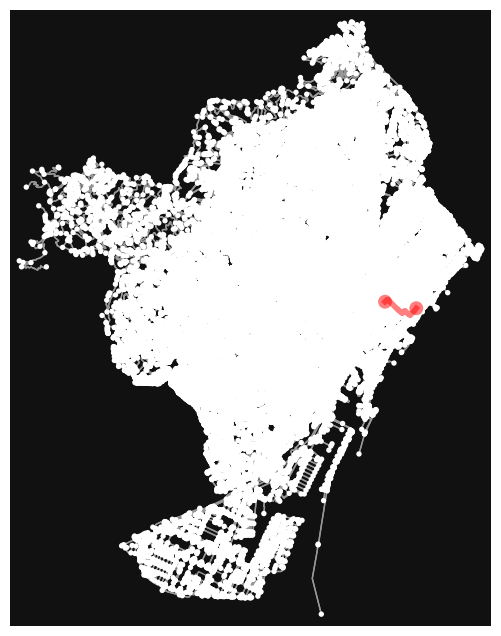

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [60]:
response_variables = json.loads(response_a['content'])

if response_variables['tool']=='navigationTool':
  getRoute(originName, response_variables['args']['destination'], response_variables['args']['regionName'], response_variables['args']['travelMode'])

In [61]:
response_variables

{'message': 'The Parc del Poblenou is located about 10 minutes walking from the IAAC institution in Poblenou.',
 'tool': 'navigationTool',
 'args': {'origin': 'IAAC, Poblenou, Barcelona',
  'destination': 'Parc del Poblenou, Poblenou, Barcelona',
  'regionName': 'Barcelona',
  'travelMode': 'pedestrian'}}

In [62]:
# data preperation
graph = osmnx.graph_from_place(PLACE_NAME)
nodes, edges = osmnx.graph_to_gdfs(graph)
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)

<ipython-input-62-0fa3a95aab7b>:4: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<ipython-input-62-0fa3a95aab7b>:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


In [63]:
def geocode(our_places, provider="nominatim",user_agent="autogis2023",timeout=10):
  geocoded_addresses = geopandas.tools.geocode(
      our_places,
      provider=provider,
      user_agent=user_agent,
      timeout=timeout
    )

  return geocoded_addresses

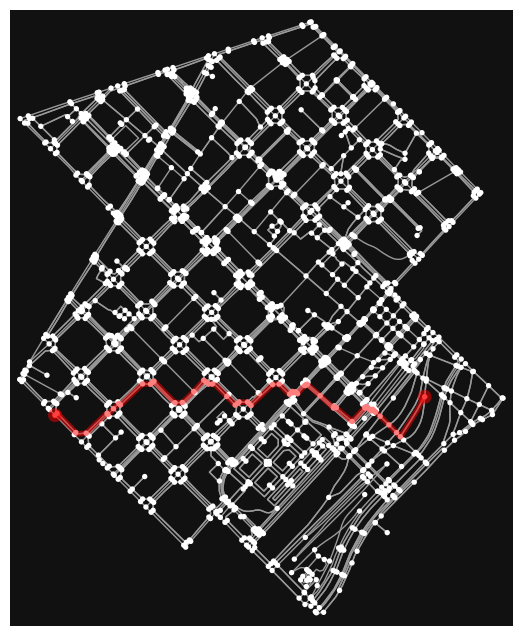

In [64]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Parc del Poblenou")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

## Function Calling

The chatGPT API comes with a utility feature that makes it easier to generate parameter for needed to call e.g. python functions. The LLM is not calling any function itself, instead it can generate input parameter we can the manually pass to the function

1. Set-up base function to call chatGPT using its function calling cpability

In [65]:
def callGPT(prompt, model="gpt-3.5-turbo-1106", tools=None):
    response = client.chat.completions.create(
        model=model,
        messages=prompt,
        tools=tools,
        #tool_choice=tool_choice
    )
    return response.choices[0].message.dict()

Lets test it:

In [66]:
conversation = [{"role": "user", "content": "what is the time right now?"}]

res = callGPT(conversation)
res["content"]

/usr/local/lib/python3.10/dist-packages/pydantic/main.py:1070: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.7/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', category=PydanticDeprecatedSince20)


"I'm sorry, but I am not able to provide real-time information such as the current time."

2. Define a list of available 'tools'

In [67]:
# lets create a function to check the time!
def getTime(time_type):
  # return day time or date
  now = datetime.datetime.now()
  if time_type.lower() == "time":
      return now.strftime("%H:%M:%S")
  elif time_type.lower() == "date":
      return now.strftime("%Y-%m-%d")

In [68]:
# define 'tools' using the schema defined by openAI
# more infos:
tools = []
tools.append({
        "type": "function",
        "function": {
            "name": "getTime",
            "description": "gets the current day time (time) or date (month, day, year)",
            "parameters": {
                "type": "object",
                "properties": {
                    "time_type": {
                        "type": "string",
                        "enum": ["date", "time"]},
                },
                "required": ["time_type"],
            },
        },
    })

In [69]:
# lets try this again with tools enabled
conversation = [{"role": "user", "content": "what is the time right now?"}]
res = callGPT(conversation, tools = tools)
res


{'content': None,
 'role': 'assistant',
 'function_call': None,
 'tool_calls': [{'id': 'call_KhTjAsR6pGIPtlXJU3l5HL6j',
   'function': {'arguments': '{"time_type": "time"}', 'name': 'getTime'},
   'type': 'function'}]}

In [70]:
functionName = res["tool_calls"][0]["function"]["name"]
functionArgs = json.loads(res["tool_calls"][0]["function"]["arguments"])

# lets call the time function
if functionName == "getTime":
  curTime = getTime(functionArgs["time_type"])
  print(curTime)


12:23:43


Note: the LLM only returned the argument for the function it aimed to call. If we want to use the information to answer the users question we need to add the functionr esult back to our conversation.  Ther is a specific systax/schema for that:

In [71]:
def toolResultFormater(gpt_message, function_result, tool_call_id = 0):
  tool_result = {"role": "tool",
                  "tool_call_id": gpt_message["tool_calls"][tool_call_id]["id"],
                  "name": gpt_message["tool_calls"][tool_call_id]["function"]["name"],
                  "content": function_result
                 }
  # construct a message logging the event of the tool call
  gpt_message["content"] = str(gpt_message["tool_calls"][tool_call_id]["function"])
  del gpt_message["function_call"]

  return tool_result, gpt_message


In [72]:
# lets try this again with tools enabled
conversation = [{"role": "user", "content": "is it afternoon right now?"}]

res = callGPT(conversation, tools =tools)
print (res)
functionName = res["tool_calls"][0]["function"]["name"]
functionArgs = json.loads(res["tool_calls"][0]["function"]["arguments"])

# lets call the time function
if functionName == "getTime":
  curTime = getTime(functionArgs["time_type"])

  # format the result from using the 'tool' for chatGPT
  formated_tool_result, ass = toolResultFormater(res, curTime)
  print (formated_tool_result)

  # add to conversation:
  conversation.append(ass)
  conversation.append(formated_tool_result)

print(conversation)
res = callGPT(conversation, tools =tools)




{'content': None, 'role': 'assistant', 'function_call': None, 'tool_calls': [{'id': 'call_kRMDbGZMPAjn2sCRamuFcfTB', 'function': {'arguments': '{"time_type":"time"}', 'name': 'getTime'}, 'type': 'function'}]}
{'role': 'tool', 'tool_call_id': 'call_kRMDbGZMPAjn2sCRamuFcfTB', 'name': 'getTime', 'content': '12:23:46'}
[{'role': 'user', 'content': 'is it afternoon right now?'}, {'content': '{\'arguments\': \'{"time_type":"time"}\', \'name\': \'getTime\'}', 'role': 'assistant', 'tool_calls': [{'id': 'call_kRMDbGZMPAjn2sCRamuFcfTB', 'function': {'arguments': '{"time_type":"time"}', 'name': 'getTime'}, 'type': 'function'}]}, {'role': 'tool', 'tool_call_id': 'call_kRMDbGZMPAjn2sCRamuFcfTB', 'name': 'getTime', 'content': '12:23:46'}]


In [ ]:
res

{'content': 'Yes, it is currently afternoon. The time is 21:17 (9:17 PM).',
 'role': 'assistant',
 'function_call': None,
 'tool_calls': None}

In [ ]:
# define 'tools' using the schema defined by openAI
# more infos:

tools = []

tools.append({
        "type": "function",
        "function": {
            "name": "function_name",
            "description": "describe_your_function_so_the_llm_knows_what_it_does",
            "parameters": {
                "type": "object",
                "properties": {
                    "parameterA": {
                        "type": "string",
                        "description": "describe what kind of values are expected",
                    },
                    "parameterB": {
                        "type": "string",
                        "enum": ["list", "of", "values", "to","choose", "from"]},
                },
                "required": ["parameterA"],
            },
        },
    })

# you can add multiple of such 'tools' !

In [ ]:
args = json.loads(response.tool_calls[0].function.arguments)